# 📦 Shipment Delay Risk Prediction with XGBoost

This notebook presents a complete pipeline for predicting **logistics shipment delays** using machine learning. The project leverages the **Smart Logistics Supply Chain Dataset** and applies **XGBoost** with hyperparameter tuning to classify whether a shipment will be delayed.

### 🔍 Problem Statement
Given shipment-related data such as temperature, humidity, traffic conditions, waiting time, and demand forecast, our goal is to build a model that can:
- Accurately predict if a shipment will be **delayed** or **on time**
- Highlight which features contribute most to delivery delays
- Generate and assess synthetic shipment scenarios

---

### ✅ Workflow Summary

**Step 1: Data Loading & Exploration**  
Load and inspect the dataset, removing irrelevant columns such as timestamps and IDs.

**Step 2: Data Preprocessing**  
- One-hot encode categorical variables  
- Standardize numerical features  
- Split into training and testing sets

**Step 3: Hyperparameter Tuning**  
Use `GridSearchCV` to tune XGBoost parameters for better F1 score performance.

**Step 4: Model Training & Evaluation**  
- Train the best XGBoost model
- Evaluate using accuracy, precision, recall, F1 score, and ROC-AUC
- Display a confusion matrix for error analysis

**Step 5: Feature Importance Analysis**  
Visualize the top features contributing to the delay prediction using XGBoost’s feature importance plot.

**Step 6: Synthetic Predictions**  
- Create 200 synthetic shipment records by sampling from the original dataset  
- Predict delay status and probabilities using a lightweight XGBoost model  
- Visualize the distribution of predicted probabilities  
- Display **all 200 predictions** with key logistics features

---

### 💡 Use Cases
- Real-time delay risk assessment for logistics companies  
- Feature impact analysis for operational decision-making  
- Simulation testing using synthetic shipment scenarios

---

**Libraries Used:**  
`pandas`, `matplotlib`, `seaborn`, `scikit-learn`, `xgboost`

**Model:**  
`XGBClassifier` with tuned hyperparameters using `GridSearchCV`

---

Fitting 3 folds for each of 16 candidates, totalling 48 fits
✅ Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}

📊 Model Evaluation Metrics (Tuned):
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 1.00


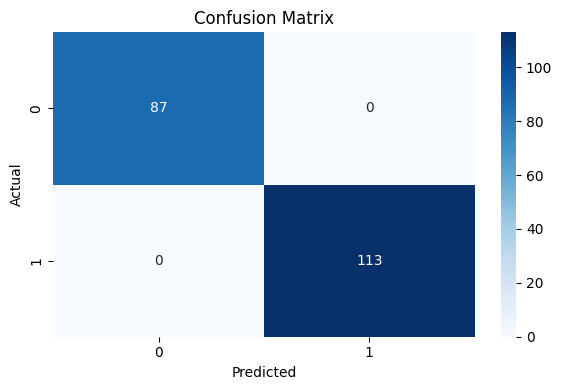

<Figure size 1200x600 with 0 Axes>

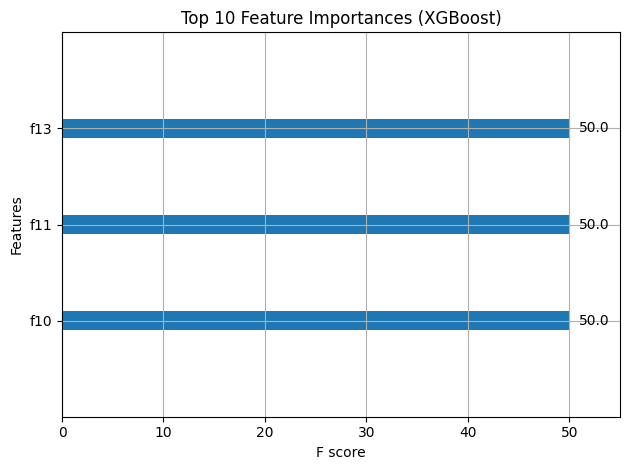


🚚 Generating Synthetic Predictions...

✅ Predicted Delay Counts:
Predicted_Delay
1    107
0     93
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


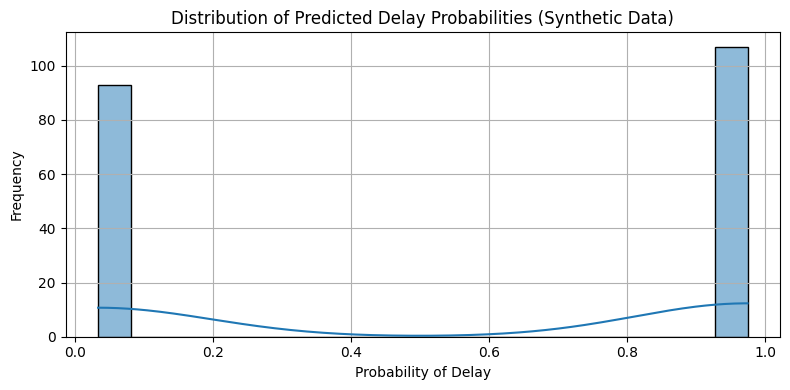

,Temperature,Humidity,Waiting_Time,Traffic_Status,Predicted_Delay,Predicted_Probability_Delay
102,23.4,59.9,41,Detour,1,0.973327
435,29.1,80.0,25,Heavy,1,0.974610
860,19.2,56.9,27,Detour,1,0.973327
270,21.2,70.3,10,Clear,1,0.973327
106,20.5,71.2,44,Detour,0,0.033782
71,27.1,67.3,35,Detour,0,0.033524
700,22.5,69.7,55,Heavy,1,0.974610
20,29.3,59.4,31,Detour,0,0.033524
614,29.7,52.1,41,Clear,0,0.033782
121,25.9,77.7,38,Clear,0,0.033524


In [8]:
# Shipment Delay Risk Prediction using XGBoost with Feature Importance and Hyperparameter Tuning

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    accuracy_score, f1_score, precision_score, recall_score
)
from xgboost import XGBClassifier, plot_importance

# Step 2: Load Dataset
df = pd.read_csv("/kaggle/input/smart-logistics-supply-chain-dataset/smart_logistics_dataset.csv")

# Step 3: Preprocessing
df_clean = df.copy()
df_clean.drop(['Timestamp', 'Asset_ID'], axis=1, inplace=True)
df_encoded = pd.get_dummies(df_clean, drop_first=True)

X = df_encoded.drop("Logistics_Delay", axis=1)
y = df_encoded["Logistics_Delay"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Hyperparameter Tuning with GridSearchCV
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0]
}

base_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
grid_search = GridSearchCV(base_model, param_grid, scoring='f1', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print("✅ Best Parameters:", grid_search.best_params_)

# Step 5: Evaluation Metrics
y_pred = best_model.predict(X_test_scaled)
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC-AUC": roc_auc_score(y_test, y_prob)
}

print("\n📊 Model Evaluation Metrics (Tuned):")
for k, v in metrics.items():
    print(f"{k}: {v:.2f}")

# Step 6: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Step 7: Feature Importance Plot
plt.figure(figsize=(12, 6))
plot_importance(best_model, max_num_features=10)
plt.title("Top 10 Feature Importances (XGBoost)")
plt.tight_layout()
plt.show()

# Step 8: Predicting Delays for 200 Synthetic Shipments
print("\n🚚 Generating Synthetic Predictions...\n")

# Train a lightweight model for fast prediction
fast_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    n_estimators=30,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)
fast_model.fit(X_train_scaled, y_train)

# Generate 200 synthetic records
synthetic_data = df.sample(200, replace=True, random_state=42).copy()
synthetic_features = synthetic_data.drop(columns=['Timestamp', 'Asset_ID', 'Logistics_Delay'])

# One-hot encode and align
synthetic_encoded = pd.get_dummies(synthetic_features, drop_first=True)
synthetic_encoded = synthetic_encoded.reindex(columns=X.columns, fill_value=0)
synthetic_scaled = scaler.transform(synthetic_encoded)

# Predict
synthetic_data["Predicted_Delay"] = fast_model.predict(synthetic_scaled)
synthetic_data["Predicted_Probability_Delay"] = fast_model.predict_proba(synthetic_scaled)[:, 1]

# Display result summary
print("✅ Predicted Delay Counts:")
print(synthetic_data["Predicted_Delay"].value_counts())

# Visualize probability distribution
plt.figure(figsize=(8, 4))
sns.histplot(synthetic_data["Predicted_Probability_Delay"], bins=20, kde=True)
plt.title("Distribution of Predicted Delay Probabilities (Synthetic Data)")
plt.xlabel("Probability of Delay")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Show all rows (remove display limit)
pd.set_option('display.max_rows', None)
# View sample
synthetic_data[["Temperature", "Humidity", "Waiting_Time", "Traffic_Status", "Predicted_Delay", "Predicted_Probability_Delay"]].head(200)
